## Week 5 Lab: K-Nearest Neighbors (KNN) Classifier

Welcome to the Week 5 Lab Session on the K-Nearest Neighbors (KNN) Classifier. This week, we will explore one of the simplest yet powerful machine learning algorithms used for classification. KNN is an instance-based learning algorithm that classifies a data point based on how its neighbors are classified.

## Introduction to KNN Classifier

The K-Nearest Neighbors (KNN) algorithm is a simple, non-parametric, instance-based learning method used for classification and regression tasks. In KNN, the output for a given data point is determined by the majority vote or average of its k nearest neighbors in the feature space. The output depends on whether KNN is used for classification or regression:

-   **Classification**: An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k -nearest neighbors.

-   **Regression**: The output is the average of the values of its k -nearest neighbors.

### Steps to Implement KNN Classifier

1.  **Data Preparation:** Loading and preprocessing the dataset

2.  **Model Definition:** Define the kNN model with the necessary and appropriate parameters

3.  **Training and Evaluation:** Train the model using training data and evaluate the performance

4.  **Parameter Tuning:** Tune the number of neighbors \$K\$ to determine the optimal model

5.  **Prediction and Visualization**: Make predictions on the test data and view the results.

## K-NN Classification on Diabetes Dataset

For this lab, we will use the diabetes dataset that is available with the `mclust` package. For ease of access, the dataset is also available on our list of datasets for the course. You can either load it by installing the `mclust` library or read it as a csv. On this lab, we will read the data directly from the `mclust` package. <br>

In [29]:
# loading the necessary packages
#install.packages(c("kknn", "mclust"))
library(mclust)        # contains the package with the diabetes dataset
library(tidyverse)
library(tidymodels)
library(dslabs)
library(ggplot2)
library(ggthemr)
library(patchwork)

# set visualization theme
ggthemr("dust")

In [30]:
data(diabetes, package="mclust")

diabetes <- as_tibble(diabetes)
head(diabetes)

class,glucose,insulin,sspg
<fct>,<dbl>,<dbl>,<dbl>
Normal,80,356,124
Normal,97,289,117
Normal,105,319,143
Normal,90,356,199
Normal,90,323,240
Normal,86,381,157


### Summary of the Dataset

It is always useful to get the summary of the data to help assess the distribution of variables and how they may interact when used in the model. Important questions to think about include, should we transform the variables or not. For this lab, we will not transform the data. However, in the exercise, we will ask you to transform the data and run the k-NN algorithm and compare the results.

In [31]:
# diabetes data summary
summary(diabetes)

      class       glucose       insulin            sspg      
 Chemical:36   Min.   : 70   Min.   :  45.0   Min.   : 10.0  
 Normal  :76   1st Qu.: 90   1st Qu.: 352.0   1st Qu.:118.0  
 Overt   :33   Median : 97   Median : 403.0   Median :156.0  
               Mean   :122   Mean   : 540.8   Mean   :186.1  
               3rd Qu.:112   3rd Qu.: 558.0   3rd Qu.:221.0  
               Max.   :353   Max.   :1568.0   Max.   :748.0  

### Visualizing the Dataset

It is important to gauge the relationships between the variables so that the appropriate technique can be used. For example, we need to know that there is a relationship between these variables at the class level such that we k-NN can be an appropriate method.

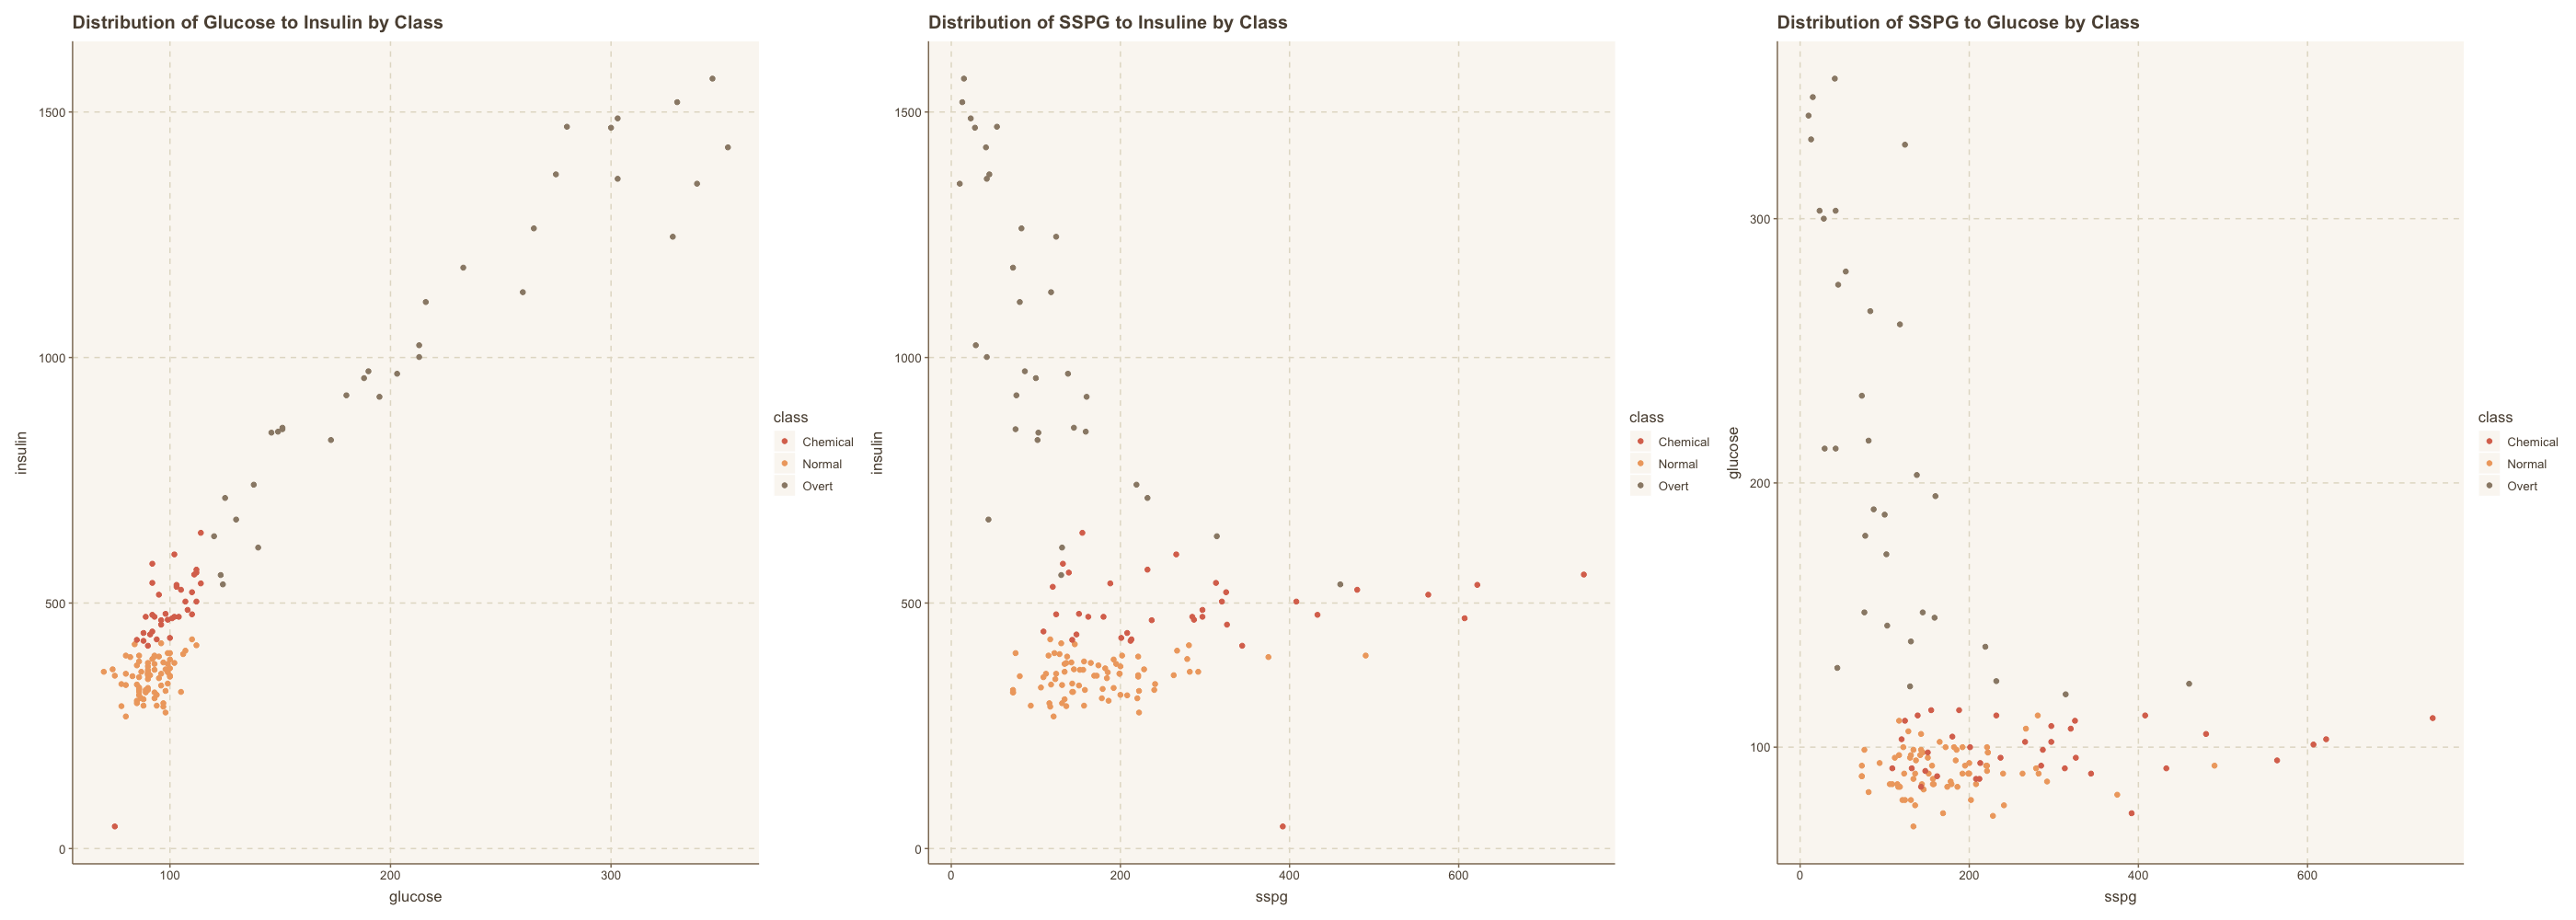

In [33]:
# ggplot(diabetes, aes(x = glucose, y = insulin, col = class)) +
#   geom_point() +
#   ggtitle("Distribution of Glucose to Insulin by Class")

# ggplot(diabetes, aes(x = sspg, y = insulin, col = class)) +
#   geom_point() +
#   ggtitle("Distribution of SSPG to Insuline by Class")

# ggplot(diabetes, aes(x = sspg, y = glucose, col = class)) +
#   geom_point() +
#   ggtitle("Distribution of SSPG to Glucose by Class")

#facet_wrap( vars(class) )

options(repr.plot.width = 28, repr.plot.height = 10, repr.plot.res = 100)

# Create the plots
p1 <- ggplot(diabetes, aes(x = glucose, y = insulin, col = class)) +
  geom_point() +
  ggtitle("Distribution of Glucose to Insulin by Class")

p2 <- ggplot(diabetes, aes(x = sspg, y = insulin, col = class)) +
  geom_point() +
  ggtitle("Distribution of SSPG to Insuline by Class")

p3 <- ggplot(diabetes, aes(x = sspg, y = glucose, col = class)) +
  geom_point() +
  ggtitle("Distribution of SSPG to Glucose by Class")

# Arrange the plots in a row
p1 | p2 | p3

Yes, we do see relationships between the variables and as it relates to their classes. We also see separation areas which suggest that distance based approach will work well for this dataset.

## Implementing K-NN Classifier

In the previous labs, we have looked at data preparation ahead of modeling. On this section, we split the data into `train` and `test` set and configure our model to run on it.

In [34]:
# for reproducibility 
set.seed(4522)
data_split <- initial_split(diabetes, prop = .8)

# extract training and testing data
train_data <- training(data_split)
test_data <- testing(data_split)

dim(train_data); dim(test_data)

[1] 116   4

[1] 29  4

### KNN Model Configuration and Fitting

The code below creates a k-NN model and train the model to predict classes based on `k=3` .

In [35]:
# specifying the knn model
knn_spec <- nearest_neighbor( neighbors = 3 ) %>%
              set_mode("classification") %>%
              set_engine("kknn")

# fitting the model
knn_fit <- knn_spec %>%
              fit(class ~ ., data = train_data )

# showing the model fit
knn_fit

parsnip model object


Call:
kknn::train.kknn(formula = class ~ ., data = data, ks = min_rows(3,     data, 5))

Type of response variable: nominal
Minimal misclassification: 0.0862069
Best kernel: optimal
Best k: 3

### Confusion Matrix of the Classification

The confusion matrix is a vital tool for evaluating the performance of a classification model. It provides a summary of the prediction results on a classification problem by comparing the actual target values with the predicted values.

In [36]:
# confusion matrix
augment( knn_fit, new_data = train_data) %>%
         conf_mat(truth = class, estimate = .pred_class) 

          Truth
Prediction Chemical Normal Overt
  Chemical       30      0     0
  Normal          0     64     0
  Overt           0      0    22

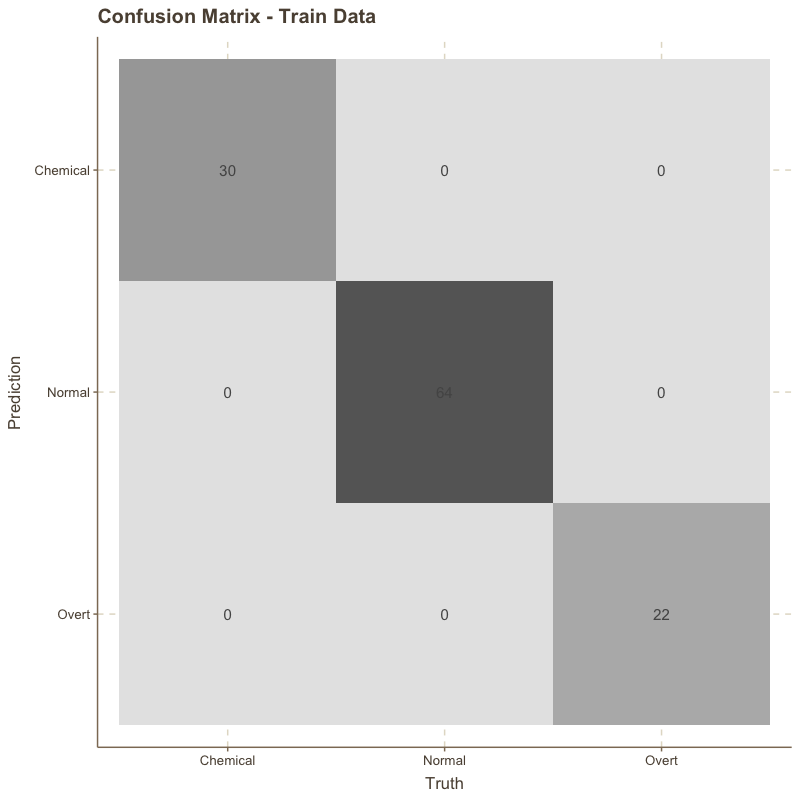

In [37]:
# confusion matrix for train data
options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res = 100)

augment( knn_fit, new_data = train_data) %>%
         conf_mat(truth = class, estimate = .pred_class) %>%
         autoplot( type = 'heatmap') +
         labs(title = "Confusion Matrix - Train Data")

### Prediction on the Test Data

It is rather obvious that the accuracy of the K-NN model with 3 nearest neighbors is very good for the test data. We can now compute this for the test data which the model has not seen before.

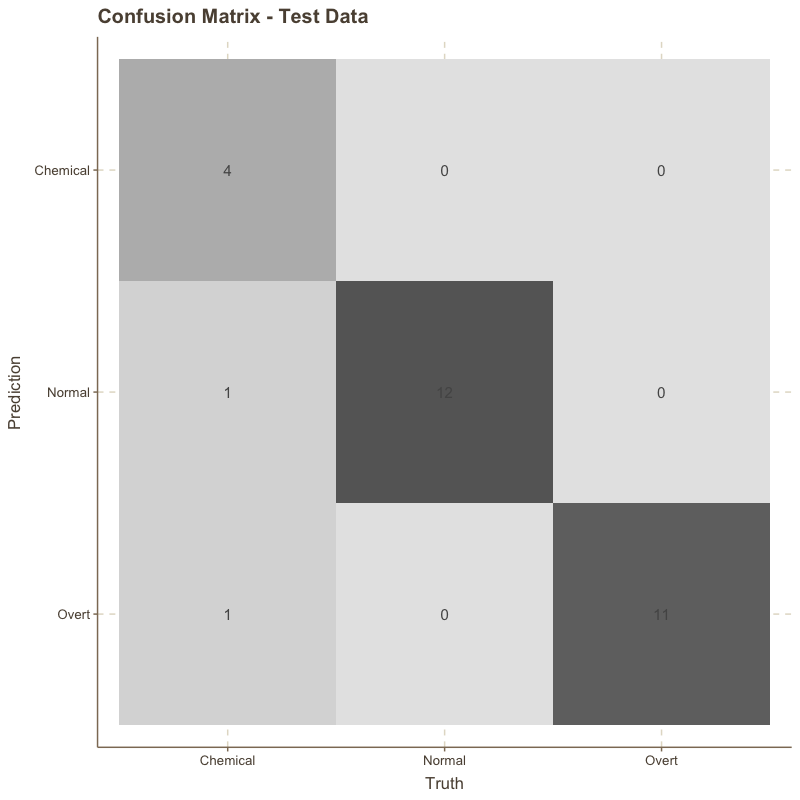

In [38]:
# confusion matrix for Test data
augment( knn_fit, new_data = test_data) %>%
         conf_mat(truth = class, estimate = .pred_class) %>%
         autoplot( type = 'heatmap') +
         labs(title = "Confusion Matrix - Test Data")

In [39]:
# computing accuracy
augment( knn_fit, new_data = test_data ) %>% 
         accuracy( truth = class, estimate = .pred_class ) 

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.9310345


### Additional Metrics for the Classifier

We can now use the following code to computer additional metrics to assess other elements of the model performance.

In [40]:
augment( knn_fit, new_data = test_data ) %>% 
    summarise(
               accuracy = mean( .pred_class == class),
               sensitivity = sens_vec(truth = class, estimate = .pred_class),
               specificity = spec_vec(truth = class, estimate = .pred_class),
               precision = precision_vec(truth = class, estimate = .pred_class),
               recall = recall_vec(truth = class, estimate = .pred_class),
               f1 = f_meas_vec(truth = class, estimate = .pred_class)
)

accuracy,sensitivity,specificity,precision,recall,f1
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9310345,0.8888889,0.9618736,0.9465812,0.8888889,0.9055072


## Running Multiple K-NN Models with Varying K

We have seen how to build a model with a pre-defined `K`. Now, let's implement a few models with various `k` values.

In [24]:
# knn model specification
knn_model_spec <- nearest_neighbor() %>%
                   set_mode("classification") %>%
                   set_engine("kknn")

# defining recipe
knn_recipe <- recipe( class ~., data = train_data)

# Workflow
knn_workflow <- workflow() %>%
                 add_recipe( knn_recipe )

In [25]:
# K = 1
knn_model_1 <- knn_workflow %>%
                add_model(knn_model_spec %>% set_args(neighbors = 1))

# K = 3
knn_model_3 <- knn_workflow %>%
                add_model(knn_model_spec %>% set_args(neighbors = 3))
# K = 5
knn_model_5 <- knn_workflow %>%
                add_model(knn_model_spec %>% set_args(neighbors = 5))


# Fitting the models
knn_model_fit_1 <- fit(knn_model_1, data = train_data)
knn_model_fit_3 <- fit(knn_model_3, data = train_data)
knn_model_fit_5 <- fit(knn_model_5, data = train_data)

### Confusion Matrix - `k=1`

Computing the confusion matrix for `k=1`

In [26]:
augment( knn_model_fit_1, new_data = test_data) %>%
         conf_mat(truth = class, estimate = .pred_class)

          Truth
Prediction Chemical Normal Overt
  Chemical        4      0     0
  Normal          1     12     0
  Overt           1      0    11

### Confusion Matrix - `k=3`

Computing the confusion matrix for `k=3`

In [27]:
augment( knn_model_fit_3, new_data = test_data) %>%
         conf_mat(truth = class, estimate = .pred_class)

          Truth
Prediction Chemical Normal Overt
  Chemical        4      0     0
  Normal          1     12     0
  Overt           1      0    11

### Confusion Matrix - `k=5`

Computing the confusion matrix for `k=5`

In [28]:
augment( knn_model_fit_5, new_data = test_data) %>%
         conf_mat(truth = class, estimate = .pred_class)

          Truth
Prediction Chemical Normal Overt
  Chemical        5      0     1
  Normal          1     12     0
  Overt           0      0    10